# Basit Lineer Regresyon

In [60]:
import pandas as pd
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4]) #indexleri değişken gibi gördü bunu düzeltmek için yaptık:)
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T
#std cok büyük ama biz dağilima bakıyoruz bu tek başına sorunn olduuğunu göztermez
#daha yayvam-n bir dağılılm olduğunu düşünebiliriz
#median ve maen arasında cddi fark varsa o zaman sıkınto vardır dit-yebiliriz

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.median()

TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

In [11]:
#eksisk gözelem kontrolu
df.isnull().values.any()

False

In [14]:
#korelasyona yani değişkenler arsındaki ilişkiye baklım
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


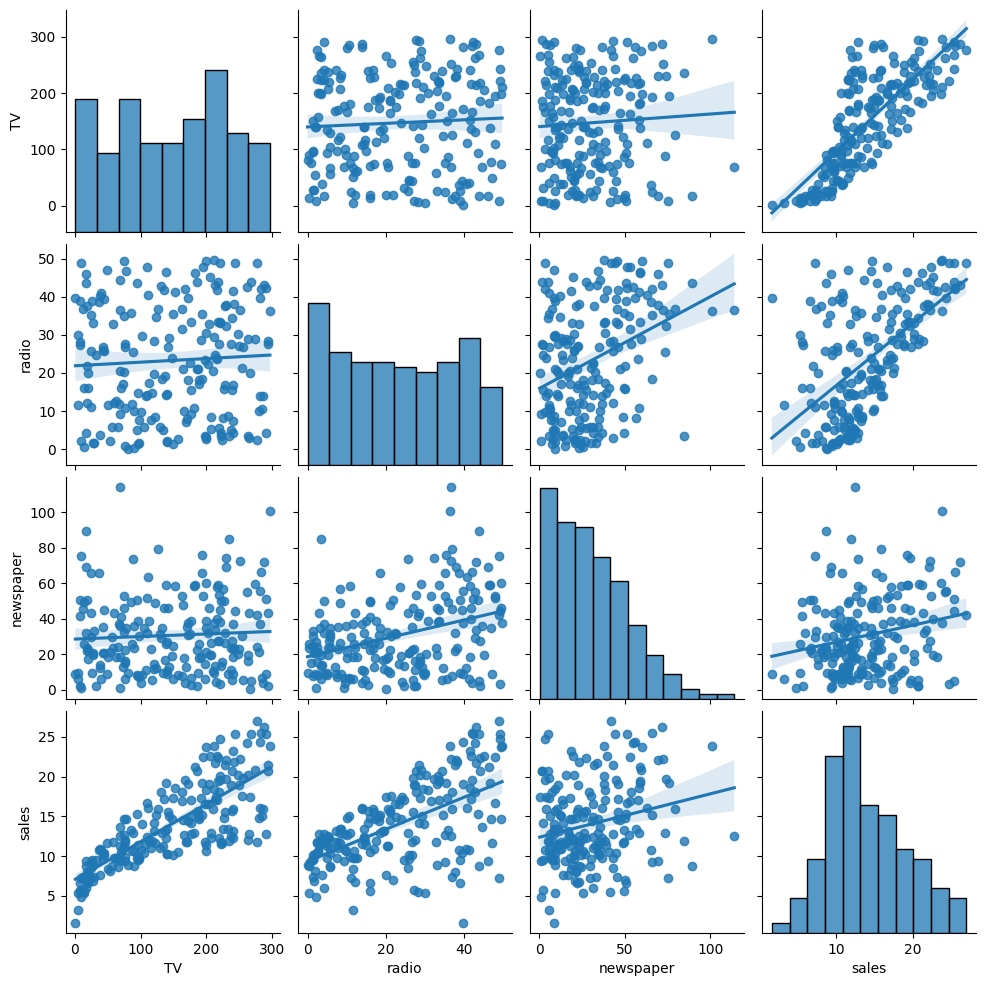

In [61]:
import seaborn as sns
sns.pairplot(df,kind="reg");

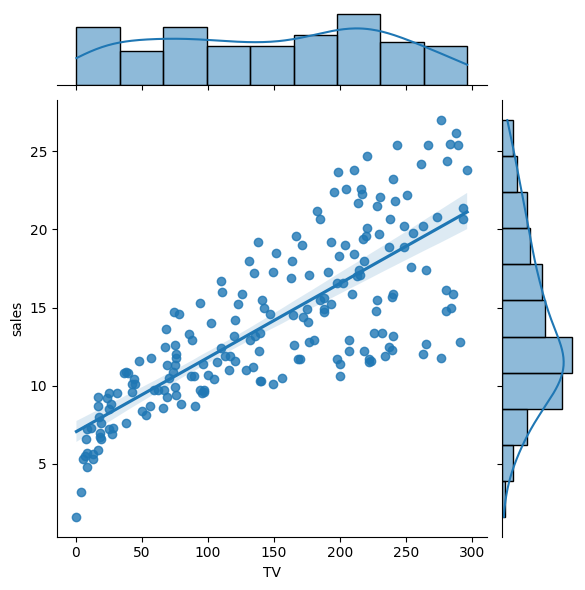

In [17]:
#tv ve sales arasındaki ilişkiye odaklanalım
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

In [18]:
#mesala tv ile radio arasında ciddi bşr ilişki yok 
# o zaman saales için tv ve radio her ikisine de bakavilirz

### Statsmodels ile modelleme

In [62]:
import statsmodels.api as sm

In [63]:
x=df[["TV"]]
print(type(x))
x[0:5]


<class 'pandas.core.frame.DataFrame'>


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [35]:
x=sm.add_constant(x)

In [36]:
x[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [64]:
y=df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [65]:
lm=sm.OLS(y,x)


In [66]:
model=lm.fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                   3.52e-100
Time:                        17:37:47   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()
# aynı şekli elde ettik sadece fonksiyonn çağirma şeklimiz farlı
# dikkatini çekmiş ayrı ayrı x'i matrise
# y yi seriye çeirme işlemlerini aylamış oolduk

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.47e-42
Time:                        17:37:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#katsayıları göreyim de artık tahmini yapayım dersen

In [69]:
#modelin oarametreleri
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [70]:
#kat sayı detayları için
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [71]:
#katsayıların güven aralıkları için
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [72]:
#modelin anlamlılığına ilişkin 
print("p_value %.4f"%model.f_pvalue)

p_value 0.0000


In [74]:
print("f value %.4f"%model.fvalue)

f value 312.1450


In [77]:
print("t value %.4f"%model.tvalues[0:1])

t value 15.3603


In [78]:
model.mse_model

3314.6181668686495